In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
train_images, test_images = train_images/255.0, test_images/255.0
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
train_labels[:5]
train_labels = train_labels.reshape(-1)
train_labels[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

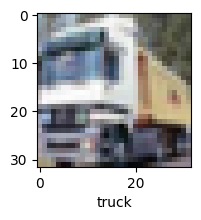

In [ ]:
classes = ["airplanes", "automobile", "bird", "cat","deer", "dog", "frog", "horse",
            "ship", "truck"]

def plot_sample(x,y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
plot_sample(train_images,train_labels,1)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu", input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = "relu"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer = "adam",
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
               metrics = ["accuracy"])
history = model.fit(train_images,train_labels, epochs = 10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 18s 5ms/step - loss: 1.5149 - accuracy: 0.4493 - val_loss: 1.2484 - val_accuracy: 0.5413
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1489 - accuracy: 0.5941 - val_loss: 1.0400 - val_accuracy: 0.6346
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9927 - accuracy: 0.6521 - val_loss: 0.9709 - val_accuracy: 0.6623
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8936 - accuracy: 0.6858 - val_loss: 0.9070 - val_accuracy: 0.6852
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8234 - accuracy: 0.7149 - val_loss: 0.9224 - val_accuracy: 0.6855
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7615 - accuracy: 0.7330 - val_loss: 0.8756 - val_accuracy: 0.6957
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7189 - accuracy: 0.7473 - val_loss: 0.8343 - val_accurac

In [ ]:
test_loss, test_accuracy= model.evaluate(test_images, test_labels, verbose=2)
print("test loss: " ,test_loss)
print("test accuracy: ", test_accuracy)

313/313 - 1s - loss: 0.8578 - accuracy: 0.7204 - 685ms/epoch - 2ms/step
test loss:  0.8578208088874817
test accuracy:  0.7203999757766724


1/1 [==============================] - 0s 170ms/step
Class:  8
class probabilities: [[ 4.2549086  8.212974   0.         0.         0.         0.
   0.         0.        10.759661   1.5279592]]


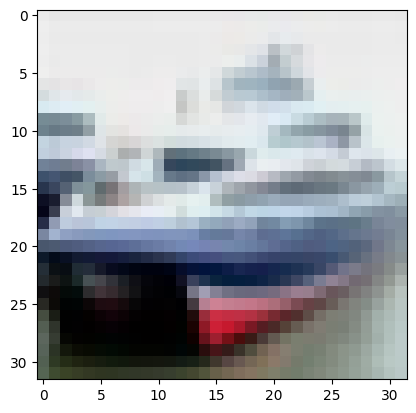

In [ ]:
import numpy as np
from PIL import Image
from skimage import io


"""
#load the image
path = "E:\Research\source_code\cat1.jpg"
original_image = Image.open(path)
img = original_image.resize((32,32))
img_array = np.array(img)/255.0
"""


image = np.expand_dims(test_images[1], axis=0)
plt.imshow(test_images[1])

#make prediction
pred = model.predict(image)
class_probability= np.maximum(pred,0)
predicted_class = np.argmax(class_probability)

print("Class: ", predicted_class)
print("class probabilities:", class_probability)

In [ ]:
# Get the indices that would sort the array in descending order
sorted_indices = np.argsort(class_probability[0])[::-1]

# Sort the class probabilities in descending order
sorted_class_probabilities = class_probability[0][sorted_indices]

print("Sorted Class Probabilities:", sorted_class_probabilities)
print("Indices of Sorted Probabilities:", sorted_indices)

Sorted Class Probabilities: [10.759661   8.212974   4.2549086  1.5279592  0.         0.
  0.         0.         0.         0.       ]
Indices of Sorted Probabilities: [8 1 0 9 7 6 5 4 3 2]


Text(0, 0.5, 'probabilities')

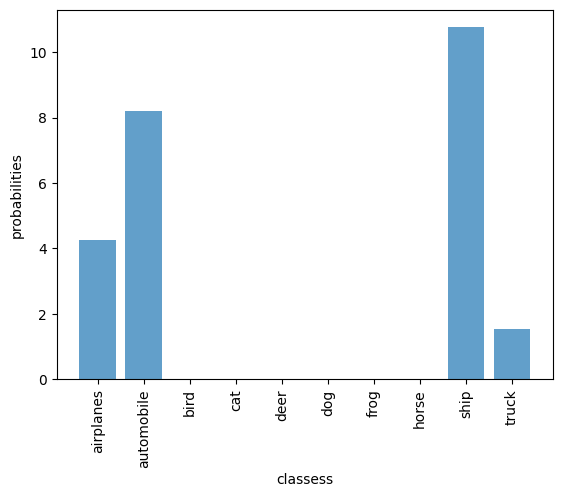

In [ ]:
class_indicies = np.arange(len(classes))
plt.bar(class_indicies, class_probability[0], align="center", alpha=0.7)
plt.xticks(class_indicies,classes, rotation = "vertical")
plt.xlabel("classess")
plt.ylabel("probabilities")

LIME explanations

The figure shows light and dark gray areas which are the decision boundaries for the classes for each (x1,x2) pairs in the dataset. LIME is able to provide explanations for the predictions of an individual record (take a blue dot). The explanations are created by generating a new dataset of perturbations around the instance to be explained (colored markers around the blue dot). The output or class of each generated perturbation is predicted with the machine-learning model (colored markers inside and outside the decision boundaries). The importance of each perturbation is determined by measuring its distance from the original instance to be explained. These distances are converted to weights by mapping the distances to a zero-one scale using a kernel function (for ex, color scale for the weights). All this information: the new generated dataset, its class predictions and its weights are used to fit a simpler model, such as a linear model (blue line), that can be interpreted. The attributes of the simpler model, coefficients for the case of a linear model, are then used to generate explanations.
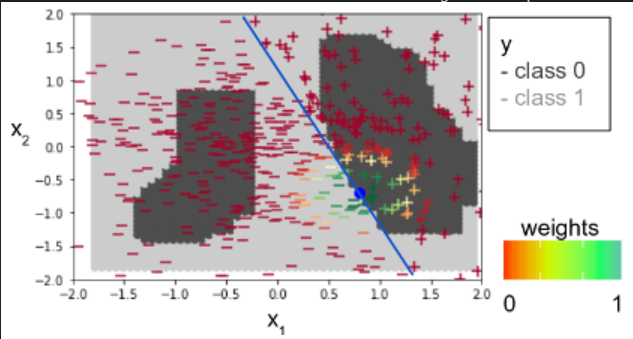

Step 1: Create pertubation of image

For the case of image explanations, perturbations will be generated by turning on and off some of the superpixels in the image.

Extracting super-pixel from image

Superpixels of a image can be generated by using the quickshift segmentation algorithms.

-https://github.com/scikit-image/scikit-image/blob/main/skimage/segmentation/_quickshift.py

-https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_segmentations.html

In [ ]:
test_images[1].shape

(32, 32, 3)

18


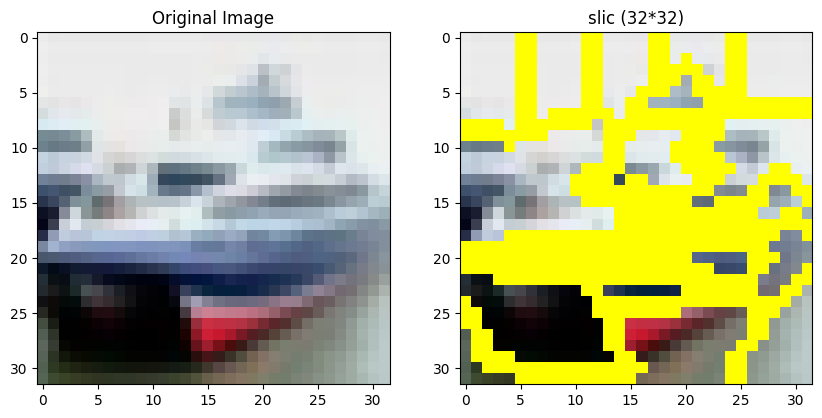

In [ ]:

from skimage.transform import resize
from skimage.segmentation import mark_boundaries, quickshift,felzenszwalb, watershed,slic


"""we need numpy array representing the image for segmenting the image with quickshift
Image.open(path) return an image object. However io.imread(path) returns array that represents array

"""
#applying superpixel segmentation
#super_image = color.rgb2lab(img_array)   #some recommended LAB color space for quickshift

#original_image_array = io.imread(path)
#input_image = resize(image, (32,32,3))

superpixels = slic(test_images[1], n_segments=30)
num_superpixels= np.unique(superpixels).shape[0]
print(num_superpixels)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(test_images[1])


# displaying superpixel boundaries on the original image
superpixels_show =mark_boundaries(test_images[1], superpixels)

plt.subplot(1,2,2)
plt.title("slic (32*32)")
plt.imshow(superpixels_show)



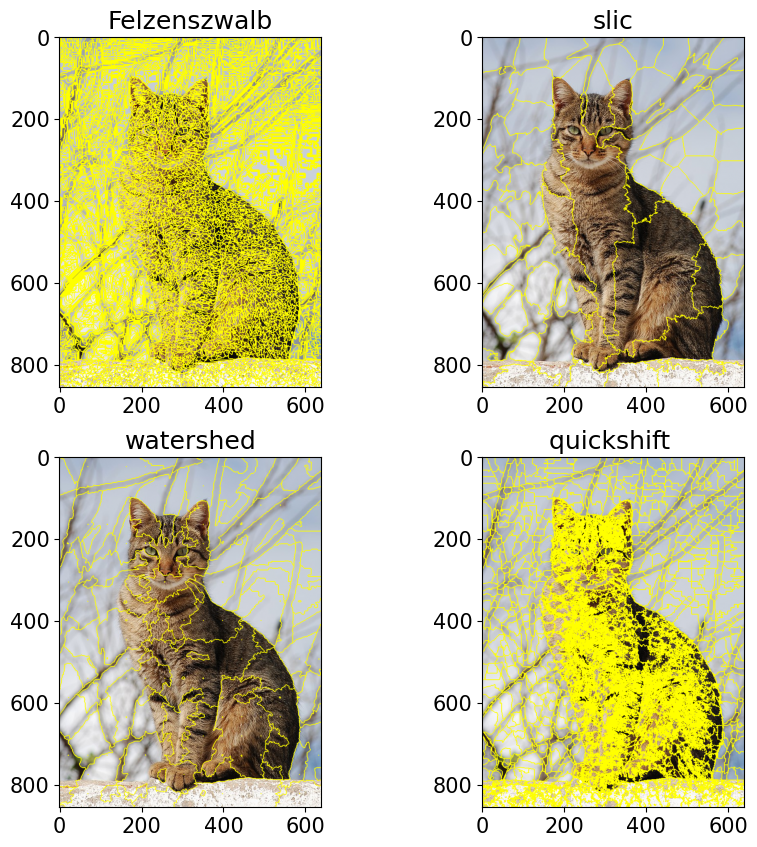

In [ ]:
path = ("E:\Research\source_code\cat1.jpg")
original_image_array= io.imread(path) #io.read reads an image and returns its array
#other libaries for segmenting an image
from skimage.filters import sobel
from skimage.color import rgb2gray

felzen_segments = felzenszwalb(original_image_array)
slic_segments = slic(original_image_array)
water_segments = watershed(sobel(rgb2gray(original_image_array)), markers=250)
quickshift_segments =quickshift(original_image_array, kernel_size= 3, max_dist=9)

plt.figure(figsize=(10, 10))
plt.rcParams["font.size"] = 15

plt.subplot(2, 2, 1)
plt.title("Felzenszwalb")
plt.imshow(mark_boundaries(original_image_array,felzen_segments))


plt.subplot(2, 2, 2)
plt.title("slic")
plt.imshow(mark_boundaries(original_image_array,slic_segments))

plt.subplot(2, 2, 3)
plt.title("watershed")
plt.imshow(mark_boundaries(original_image_array,water_segments))

plt.subplot(2,2,4)
plt.title("quickshift ")
plt.imshow(mark_boundaries(original_image_array, quickshift_segments))


Creating Random Perturbations

It is condidered that having a large number of perturbations will give more reliable explanations. Random zeros and ones are generated as perturbations. 1 represents a superpixel is active and 0 represents as it is off.

Note: the length of the printed vector corresponds to the number of superpixels in the image.

In [ ]:
num_perturb = 150
perturbation = np.random.binomial(1,0.5, size=(num_perturb, np.max(superpixels)+1)) #perturb containing 0s and 1s binomial distribution
perturbation

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 1]])

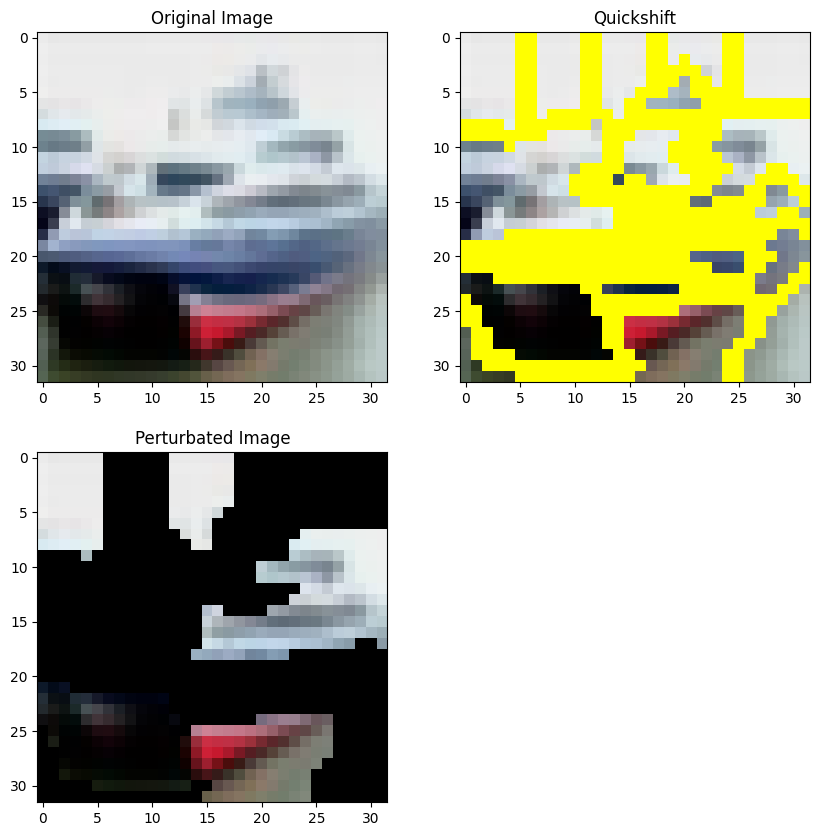

In [ ]:
# purtubating the given image based on a perturbation vector and predefined the superpixels (segments)

import copy

def perturb_image(images, perturbation, segments):
    active_pixels = np.where(perturbation == 1)[0] #"where" function to find the indices of elements in the "perturbation" array that are equal to 1
                                                    #[0]: This part extracts the indices where the condition is True (i.e., where the elements are equal to 1).
    mask = np.zeros(segments.shape) # setting all segments into zero values

    for active in active_pixels:
        mask[segments == active] = 1
    perturbed_image = copy.deepcopy(images)
    perturbed_image = images*mask[:,:,np.newaxis]
    """This part of the code adds a new axis to the "mask" array.
    This is often done to ensure that the dimensions of the "mask" align with the dimensions of the "image" for element-wise operations."""

    return perturbed_image

plt.figure(figsize=(10, 10))

plt.subplot(2,2,3)
plt.title("Perturbated Image")
plt.imshow(perturb_image(test_images[1], perturbation[10], superpixels))

plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(test_images[1])

plt.subplot(2,2,2)
plt.title("Quickshift")
plt.imshow(superpixels_show)

Step 2;
Use CNN to predict classes of newly generated images.

This is the most computationally expensive step in LIME because a prediction for each perturbed image have to be computed. From the shape of the predictions we can see for each of the perturbations we have the output probability for each of the classes.

In [ ]:
predictions_for_perturbations = []
for x in perturbation:
    perturbed_image = perturb_image(test_images[1], x, superpixels)
    predicting_perturb = model.predict(perturbed_image[np.newaxis,:,:,:])
    predictions_for_perturbations.append(predicting_perturb)

predictions_for_perturbations= np.array(predictions_for_perturbations)
predictions_for_perturbations.shape

1/1 [==============================] - 0s 17ms/step


(150, 1, 10)

Step3:

Computing distances between the original image and each of the perturbed images and compute weights(importance) of each perturbed image

The distance between each randomly generated perturbations and the image being explained is computed using the cosine distance. For the shape of the "distances" array it can be noted that, as expected, there is a distance for every generated perturbation.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_distances.html

In [ ]:
from sklearn import metrics
image_to_explained = np.ones(np.max(superpixels)+1)[np.newaxis,:]
distances =metrics.pairwise.cosine_distances(perturbation, image_to_explained)
distances.shape

(150, 1)

Using kernel function to compute weights

The distance between a datapoint to the perturbated datapoints are mapped to a value between zero and one(weight) using a kernel function. The kernel function is used to measure the similarity or distance between datapoints, and it determines how much influence one data point should have on another. In our case, it determines the distance from a datapoint to the perturbated datapoints and how much they have impact on it. A common choice for defining the weight of randomly perturbated data points is the Radial Basis Function (RBF) kernel, also known as the Gaussian Kernel. The RBF function takes distances as input and transforms them into weights. It does this by assigning higher weights to data points that are close to each other in terms of distance and lower weights to those that are farther apart. In cosine case, it is expected that RBF outputs stable weights (between 0 and 1).

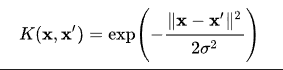

https://en.wikipedia.org/wiki/Radial_basis_function_kernel

In [ ]:
kernel_size = 0.25
weights =np.exp(-(distances**2)/kernel_size**2).ravel()  #Sample weights must be 1D array or scalar for Linear regression
weights.shape

(150,)

Step 4

Using "perturbations", "predictions" and "weights" to fit an explainable (linear) model

A linear regression model is fited using data from the preturbations, predictions, and weights. Each coefficients in the linear model corresponds to one superpixel in the segmented image. These coefficients represent how each superpixel is important for the prediction.

In [ ]:
from sklearn.linear_model import LinearRegression

#top_classes= np.argsort(class_probability[0])[-5:][::-1]
#top_classes
sorted_indices
print(predicted_class)
class_to_explain = sorted_indices[0]# predicted_class
simple_model = LinearRegression()
simple_model.fit(perturbation, predictions_for_perturbations[:,:,class_to_explain], weights)

coefficient = simple_model.coef_[0]
coefficient

8


array([-0.28603582,  0.90656795, -1.43683604,  1.26810238, -0.07695896,
       -0.55099382, -0.97104908, -0.06857625,  1.67052779,  1.01613057,
        2.53338008,  0.73922063,  0.58662456,  0.77727058, -0.1133097 ,
       -0.76521753,  0.68484686,  0.92818692,  0.53683178])

Compute top features (superpixels)

Now, we need to sort out the coefficients to figure out which are the superpixels that have larger coefficients ( magnitute) for the prediction.

In [ ]:
num_top_features = 4
top_features = np.argsort(coefficient)[-num_top_features:]
top_features

plt.subplot(2,2,1)
plt.title("Feature Rank: 1")
plt.imshow(perturb_image(test_images[1], perturbation[9], superpixels))

array([ 9,  3,  8, 10])

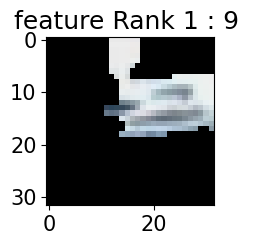

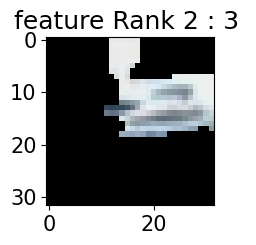

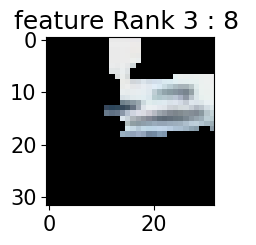

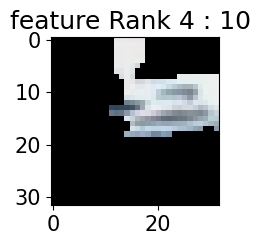

In [ ]:
mask = np.zeros(num_superpixels)
#activating top features
mask[top_features] = True

for idx, i in enumerate(top_features):
  plt.subplot(2,2, idx + 1)
  plt.title("feature Rank {} : {} ".format(idx +1,i))
  plt.imshow(perturb_image(test_images[1], mask, superpixels))
  plt.show()


Show LIME explanation (image with top features)

the most important superpixels defined (top_features) in an image after covering up less relevant superpixels.

[[ 1  1  1 ...  5  5  5]
 [ 1  1  1 ...  5  5  5]
 [ 1  1  1 ...  5  5  5]
 ...
 [18 18 14 ... 16 16 16]
 [18 18 18 ... 16 16 16]
 [18 18 18 ... 16 16 16]]


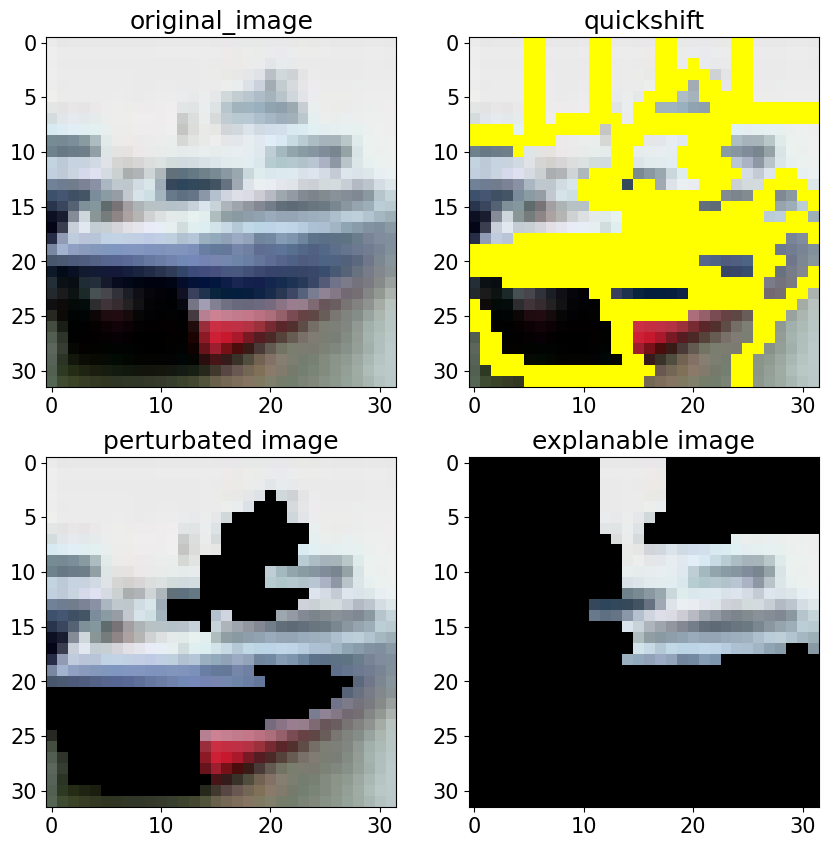

In [ ]:
mask = np.zeros(num_superpixels)
#activating top features
mask[top_features] = True

plt.figure(figsize=(10, 10))
plt.rcParams["font.size"] = 15

plt.subplot(2, 2, 1)
plt.title("original_image")
plt.imshow(test_images[1])

plt.subplot(2,2,2)
plt.title("quickshift")
plt.imshow(superpixels_show)

plt.subplot(2,2,3)
plt.title("perturbated image")
plt.imshow(perturb_image(test_images[1], perturbation[0], superpixels))

plt.subplot(2,2,4)
plt.title("explanable image")
plt.imshow(perturb_image(test_images[1],mask,superpixels))